In [ ]:
# Importing all the libraries needed
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import pandas as pd
import os, requests, cv2, random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models
from tensorflow.keras import Sequential, layers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Loading data and preprocessing **it**

In [ ]:
# loading the pictures of tomatoes

test_path = '/content/drive/MyDrive/tomato/test' # the path to test data
train_path = '//content/drive/MyDrive/tomato/train' # Replace with the actual path to your training data

In [ ]:
# for this challenge we are using ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.0,
                               shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                validation_split=0.3)# specifying the validation split inside the function

test_datagen = ImageDataGenerator(rescale=1/255.0,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

In [ ]:
train_gen = train_datagen.flow_from_directory(
                                train_path, # This now points to the corrected path
                                target_size=(224, 224),
                                batch_size=32,
                                shuffle=True,
                                class_mode='categorical',
                                subset='training')

Found 10552 images belonging to 10 classes.


In [ ]:
val_gen = train_datagen.flow_from_directory(
                                train_path,
                                target_size=(224,224),
                                batch_size=32,
                                shuffle=True,
                                class_mode='categorical',
                                subset='validation')

Found 4517 images belonging to 10 classes.


In [ ]:
test_gen = test_datagen.flow_from_directory(
        test_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle = False) #shuffle will not affect the accuracy of the model, but will affect the computation of some metrics that depend on the order of the samples

Found 3771 images belonging to 10 classes.


**1a. Building a CNN model with a learning rate of 0.001**


In [39]:
import tensorflow as tf

# Assuming 'train_gen', 'val_gen', and 'test_gen' are already defined

# For training data
X_train, y_train = next(train_gen)

# For validation data
X_val, y_val = next(val_gen)

# For testing data
X_test, y_test = next(test_gen)

# Now you can proceed with normalization and one-hot encoding
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)  # Replace 10 with the actual number of classes
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)

In [ ]:
# CNN model layers

cnn = models.Sequential()

cnn.add(layers.Conv2D (32, kernel_size = (3,3), activation='relu', input_shape = [224, 224,3])),
cnn.add(layers.MaxPooling2D(pool_size = (2, 2))),

cnn.add(layers.Conv2D(64, (3,3), activation='relu')),
cnn.add(layers. MaxPooling2D((2, 2))),

cnn.add(layers.Conv2D (64, (3,3), activation='relu')),
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers.Conv2D(64, (3, 3), activation='relu')),
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers. Conv2D (64, (3, 3), activation='relu')),
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers.Conv2D(64, (3, 3), activation='relu')),
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers.Flatten()),

cnn.add(layers.Dense(64,activation='relu'))
#output layer
cnn.add(layers.Dense(10,activation='softmax'))

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

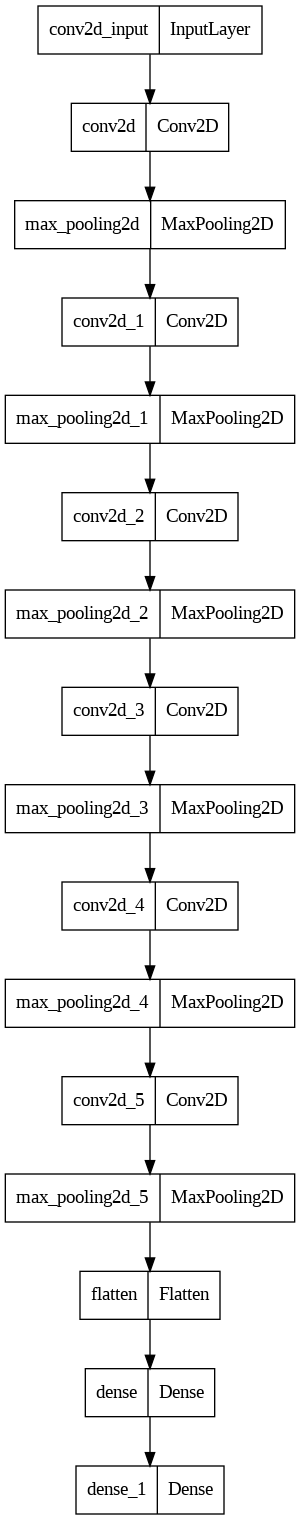

In [37]:
from tensorflow.keras.utils import plot_model
plot_model(cnn)

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
cnn.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

Before training the model, let's define an Early Stopping to avoid oferfitting.

In [ ]:
es = EarlyStopping(monitor = 'val_accuracy',
                   mode = 'max',
                   patience = 20,
                   verbose = 1,
                   restore_best_weights = True)

In [21]:
history = cnn.fit(x = train_gen,
                    callbacks = [es],
                    steps_per_epoch = 7000/32,
                    epochs = 15,
                    validation_steps = 3000/32,
                    validation_data = val_gen)

Epoch 1/15
218/218 [==============================] - 1040s 5s/step - loss: 0.8070 - accuracy: 0.7179 - val_loss: 0.8317 - val_accuracy: 0.7214
Epoch 2/15
218/218 [==============================] - 1019s 5s/step - loss: 0.6812 - accuracy: 0.7621 - val_loss: 0.5281 - val_accuracy: 0.8195
Epoch 3/15
218/218 [==============================] - 1034s 5s/step - loss: 0.5587 - accuracy: 0.8070 - val_loss: 0.5528 - val_accuracy: 0.8029
Epoch 4/15
218/218 [==============================] - 962s 4s/step - loss: 0.5259 - accuracy: 0.8149 - val_loss: 0.5430 - val_accuracy: 0.8162
Epoch 5/15
218/218 [==============================] - 936s 4s/step - loss: 0.4545 - accuracy: 0.8433 - val_loss: 0.5078 - val_accuracy: 0.8142
Epoch 6/15
218/218 [==============================] - 952s 4s/step - loss: 0.4237 - accuracy: 0.8510 - val_loss: 0.4592 - val_accuracy: 0.8454
Epoch 7/15
218/218 [==============================] - 985s 4s/step - loss: 0.3856 - accuracy: 0.8671 - val_loss: 0.3530 - val_accuracy: 0.8

In [32]:
scores = cnn.evaluate(test_gen)

118/118 [==============================] - 170s 1s/step - loss: 0.3110 - accuracy: 0.8995


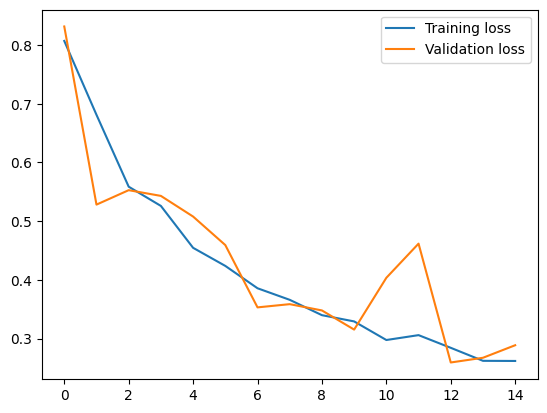

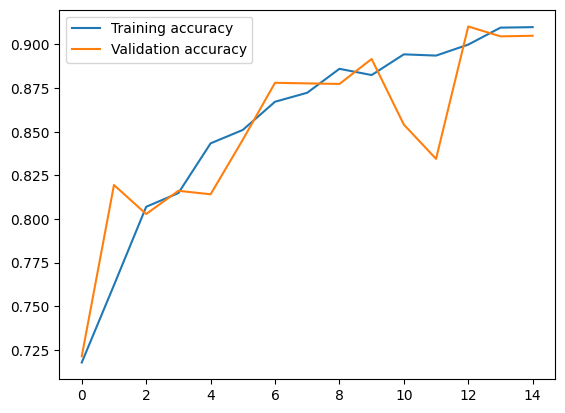

In [33]:
# plot the loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

In [24]:
# don't forget to save your model for later
cnn.save('cnn.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Making predictions, confusion matrix, metrics.

In [25]:
test_steps_per_epoch = np.math.ceil(test_gen.samples / test_gen.batch_size)

<ipython-input-25-c676ae2200e0>:1: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_gen.samples / test_gen.batch_size)


In [26]:
# Predict classes
predictions = cnn.predict(test_gen, steps=test_steps_per_epoch)

118/118 [==============================] - 1182s 10s/step


In [27]:
predictions[1]

array([8.1969959e-01, 1.6744746e-01, 1.7051370e-04, 1.1599658e-04,
       1.2566107e-02, 2.9467501e-11, 3.9579469e-08, 2.5883645e-07,
       2.0828984e-10, 1.6740350e-11], dtype=float32)

In [28]:
predicted_classes = np.argmax(predictions,axis=1)

In [29]:
# Get ground-truth classes and class-labels
true_classes = test_gen.classes
class_labels = list(test_gen.class_indices.keys())

In [30]:
# Print confusion matrix
confusion_matrix = confusion_matrix(test_gen.classes, predicted_classes)
print(confusion_matrix)

[[ 392   14    0    2    8    0    1    9    0    0]
 [   1  139   20    0   18    1   10    5    5    1]
 [   2   13  351    0    6    0    2    1    4    3]
 [   0    3    6  142   24    1    0    1   21    2]
 [   1    7   14    9  294    2    4    1   19    4]
 [   1    3    0    3    4  282   26    0   15    2]
 [   6    3    0    1    7   12  242    2    6    2]
 [   8    4    5    0    1    8    1 1037    8    0]
 [   0    0    0    1    1    0    0    0  198    0]
 [   0    0    1    0    1    0    2    0    0  315]]


In [31]:
# To check F1 score, recall etc.
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.95      0.92      0.94       426
                        Tomato___Early_blight       0.75      0.69      0.72       200
                         Tomato___Late_blight       0.88      0.92      0.90       382
                           Tomato___Leaf_Mold       0.90      0.71      0.79       200
                  Tomato___Septoria_leaf_spot       0.81      0.83      0.82       355
Tomato___Spider_mites Two-spotted_spider_mite       0.92      0.84      0.88       336
                         Tomato___Target_Spot       0.84      0.86      0.85       281
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.98      0.97      0.97      1072
                 Tomato___Tomato_mosaic_virus       0.72      0.99      0.83       200
                             Tomato___healthy       0.96      0.99      0.97       319

                                     accu